#**Maestría en Inteligencia Artificial Aplicada**
##**Curso: Ciencia y Analitica de Datos**
###**Tecnológico de Monterrey**
###**Profesor Titular:** Maria de la Paz Rico Fernandez
###**Profesor Tutor:** Juan Miguel Meza Méndez
---
##**Equipo 170**
###Freddy Armendariz Herrera - A01793672
###Samuel Elias Flores Gonzalez - A01793668
---
##**Reto - Entrega 1 - Limpieza, Analisis, Visualizaicon, Kmeans**
Fecha: 13 de Noviembre del 2022

---
Enlace:

https://colab.research.google.com/drive/1Zac4x8CIagW34sWa1_TFJMv2LGlovfYh#scrollTo=ziy5VnXFxiqV

In [124]:
# Incluye aquí todos módulos, librerías y paquetes que requieras.

# Descargar Data Set
# ==============================
import requests, zipfile
from io import BytesIO

# Tratamiento de datos
# ==============================
import numpy as np
import pandas as pd

# Graficos
# ==============================
import seaborn as sns
import matplotlib.pyplot as plt

# Preprocesado y modelado
# ==============================
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder, StandardScaler
from sklearn.dummy import DummyRegressor
from sklearn.model_selection import RepeatedKFold
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import cross_validate
from sklearn.metrics import make_scorer
from tabulate import tabulate 
from sklearn.model_selection import GridSearchCV
from sklearn.inspection import permutation_importance
from sklearn.preprocessing import LabelEncoder

# Geopandas
# ==============================
! pip install qeds fiona geopandas xgboost gensim folium pyLDAvis descartes

import geopandas as gpd
from shapely.geometry import Point


# Kmeans
# ==============================
from sklearn.cluster import KMeans


# Mapa
# ==============================
import folium


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


---
##**Eleccion de una base de datos**

In [125]:
# Extraccion de la carpeta comprimida
url = "http://201.116.60.46/Datos_de_calidad_del_agua_de_5000_sitios_de_monitoreo.zip"
req = requests.get(url)
zipfile.ZipFile(BytesIO(req.content)).extractall()

# Lectura del csv como dataframe
path = "Datos_de_calidad_del_agua_2020/Datos_de_calidad_del_agua_de_sitios_de_monitoreo_de_aguas_subterraneas_2020.csv"
df=pd.read_csv(path, encoding="latin1")

# Datos de la calidad de aguas superficiales
df.head()

,CLAVE,SITIO,ORGANISMO_DE_CUENCA,ESTADO,MUNICIPIO,ACUIFERO,SUBTIPO,LONGITUD,LATITUD,PERIODO,...,CUMPLE_CON_DUR,CUMPLE_CON_CF,CUMPLE_CON_NO3,CUMPLE_CON_AS,CUMPLE_CON_CD,CUMPLE_CON_CR,CUMPLE_CON_HG,CUMPLE_CON_PB,CUMPLE_CON_MN,CUMPLE_CON_FE
0,DLAGU6,POZO SAN GIL,LERMA SANTIAGO PACIFICO,AGUASCALIENTES,ASIENTOS,VALLE DE CHICALOTE,POZO,-102.02210,22.20887,2020,...,SI,SI,SI,SI,SI,SI,SI,SI,SI,SI
1,DLAGU6516,POZO R013 CAÑADA HONDA,LERMA SANTIAGO PACIFICO,AGUASCALIENTES,AGUASCALIENTES,VALLE DE CHICALOTE,POZO,-102.20075,21.99958,2020,...,SI,SI,SI,SI,SI,SI,SI,SI,SI,SI
2,DLAGU7,POZO COSIO,LERMA SANTIAGO PACIFICO,AGUASCALIENTES,COSIO,VALLE DE AGUASCALIENTES,POZO,-102.28801,22.36685,2020,...,SI,SI,SI,NO,SI,SI,SI,SI,SI,SI
3,DLAGU9,POZO EL SALITRILLO,LERMA SANTIAGO PACIFICO,AGUASCALIENTES,RINCON DE ROMOS,VALLE DE AGUASCALIENTES,POZO,-102.29449,22.18435,2020,...,SI,SI,SI,SI,SI,SI,SI,SI,SI,SI
4,DLBAJ107,RANCHO EL TECOLOTE,PENINSULA DE BAJA CALIFORNIA,BAJA CALIFORNIA SUR,LA PAZ,TODOS SANTOS,POZO,-110.24480,23.45138,2020,...,SI,SI,NO,SI,SI,SI,SI,SI,SI,SI


---
##**Limpieza de los datos**

In [126]:
# Se verifica la cantidad de datos nulos en cada columna
df.isna().sum()

CLAVE                      0
SITIO                      0
ORGANISMO_DE_CUENCA        0
ESTADO                     0
MUNICIPIO                  0
ACUIFERO                   0
SUBTIPO                    0
LONGITUD                   0
LATITUD                    0
PERIODO                    0
ALC_mg/L                   4
CALIDAD_ALC                4
CONDUCT_mS/cm              6
CALIDAD_CONDUC             6
SDT_mg/L                1068
SDT_M_mg/L                 2
CALIDAD_SDT_ra             2
CALIDAD_SDT_salin          2
FLUORUROS_mg/L             0
CALIDAD_FLUO               0
DUR_mg/L                   1
CALIDAD_DUR                1
COLI_FEC_NMP/100_mL        0
CALIDAD_COLI_FEC           0
N_NO3_mg/L                 1
CALIDAD_N_NO3              1
AS_TOT_mg/L                0
CALIDAD_AS                 0
CD_TOT_mg/L                0
CALIDAD_CD                 0
CR_TOT_mg/L                0
CALIDAD_CR                 0
HG_TOT_mg/L                0
CALIDAD_HG                 0
PB_TOT_mg/L   

In [127]:
# Se descartan las columnas de CONTAMINANTES y SDT_mg/L ya que la mayor parte de sus datos son nulos.
df.drop(["CONTAMINANTES","SDT_mg/L"], inplace=True, axis=1)

Las demas columnas presentaban un 6 datos nulos como maximo, estos se pueden considerar despreciables, por lo que se procede a eliminarlos.

In [128]:
#Eliminamos los datos NaN
df.dropna(inplace = True)

In [129]:
#Se corrobora si quedo algún dato vacío, False = No hay datos nulos
df.isna().values.any()

False

Al analizar el set de datos, se puede inferir que los datos categoricos son dependientes de los datos numericos, es decir, hacen referencia a ellos, provocando asi una redundancia en los mismos, por lo tanto se procede a eliminar estas columnas y utilizar solo las numericas.

In [130]:
col_num = ['LONGITUD','LATITUD','ALC_mg/L','CONDUCT_mS/cm','SDT_M_mg/L','FLUORUROS_mg/L','DUR_mg/L','COLI_FEC_NMP/100_mL',
           'N_NO3_mg/L','AS_TOT_mg/L','CD_TOT_mg/L','CR_TOT_mg/L','HG_TOT_mg/L','PB_TOT_mg/L','MN_TOT_mg/L','FE_TOT_mg/L','SEMAFORO']
df_new = df[col_num]
df_new.head()

,LONGITUD,LATITUD,ALC_mg/L,CONDUCT_mS/cm,SDT_M_mg/L,FLUORUROS_mg/L,DUR_mg/L,COLI_FEC_NMP/100_mL,N_NO3_mg/L,AS_TOT_mg/L,CD_TOT_mg/L,CR_TOT_mg/L,HG_TOT_mg/L,PB_TOT_mg/L,MN_TOT_mg/L,FE_TOT_mg/L,SEMAFORO
0,-102.02210,22.20887,229.990,940.0,603.6,0.9766,213.732,<1.1,4.184656,0.0161,<0.003,<0.005,<0.0005,<0.005,<0.0015,0.0891,Verde
1,-102.20075,21.99958,231.990,608.0,445.4,0.9298,185.0514,<1.1,5.75011,0.0134,<0.003,<0.005,<0.0005,<0.005,<0.0015,<0.025,Verde
2,-102.28801,22.36685,204.920,532.0,342,1.8045,120.719,<1.1,1.449803,0.037,<0.003,<0.005,<0.0005,<0.005,<0.0015,<0.025,Rojo
3,-102.29449,22.18435,327.000,686.0,478.6,1.1229,199.879,<1.1,1.258597,0.0154,<0.003,0.005,<0.0005,<0.005,<0.0015,<0.025,Verde
4,-110.24480,23.45138,309.885,1841.0,1179,0.2343,476.9872,291,15.672251,<0.01,<0.003,<0.005,<0.0005,<0.005,<0.0015,<0.025,Rojo


In [131]:
# Se comprueba la cantidad de datos nulos por columna y su tipo de dato
df_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1054 entries, 0 to 1067
Data columns (total 17 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   LONGITUD             1054 non-null   float64
 1   LATITUD              1054 non-null   float64
 2   ALC_mg/L             1054 non-null   float64
 3   CONDUCT_mS/cm        1054 non-null   float64
 4   SDT_M_mg/L           1054 non-null   object 
 5   FLUORUROS_mg/L       1054 non-null   object 
 6   DUR_mg/L             1054 non-null   object 
 7   COLI_FEC_NMP/100_mL  1054 non-null   object 
 8   N_NO3_mg/L           1054 non-null   object 
 9   AS_TOT_mg/L          1054 non-null   object 
 10  CD_TOT_mg/L          1054 non-null   object 
 11  CR_TOT_mg/L          1054 non-null   object 
 12  HG_TOT_mg/L          1054 non-null   object 
 13  PB_TOT_mg/L          1054 non-null   object 
 14  MN_TOT_mg/L          1054 non-null   object 
 15  FE_TOT_mg/L          1054 non-null   o

Se aprecia como en la mayor parte de las columnas son de tipo string (object) aunque son numericas, y esto se debe a que incluyen el simbolo <.

In [132]:
# Conversion de tipo de dato de la columna y eliminacion del <
col = ['ALC_mg/L','CONDUCT_mS/cm','SDT_M_mg/L','FLUORUROS_mg/L','DUR_mg/L','COLI_FEC_NMP/100_mL','N_NO3_mg/L',
       'AS_TOT_mg/L','CD_TOT_mg/L','CR_TOT_mg/L','HG_TOT_mg/L','PB_TOT_mg/L','MN_TOT_mg/L','FE_TOT_mg/L']
for name in col:
  df_new[name] = df_new[name].astype(str)
  df_new[name] = df_new[name].replace("<","", regex=True)  
  df_new[name]= df_new[name].astype(float)

df_new.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-doc

,LONGITUD,LATITUD,ALC_mg/L,CONDUCT_mS/cm,SDT_M_mg/L,FLUORUROS_mg/L,DUR_mg/L,COLI_FEC_NMP/100_mL,N_NO3_mg/L,AS_TOT_mg/L,CD_TOT_mg/L,CR_TOT_mg/L,HG_TOT_mg/L,PB_TOT_mg/L,MN_TOT_mg/L,FE_TOT_mg/L,SEMAFORO
0,-102.02210,22.20887,229.990,940.0,603.6,0.9766,213.7320,1.1,4.184656,0.0161,0.003,0.005,0.0005,0.005,0.0015,0.0891,Verde
1,-102.20075,21.99958,231.990,608.0,445.4,0.9298,185.0514,1.1,5.750110,0.0134,0.003,0.005,0.0005,0.005,0.0015,0.0250,Verde
2,-102.28801,22.36685,204.920,532.0,342.0,1.8045,120.7190,1.1,1.449803,0.0370,0.003,0.005,0.0005,0.005,0.0015,0.0250,Rojo
3,-102.29449,22.18435,327.000,686.0,478.6,1.1229,199.8790,1.1,1.258597,0.0154,0.003,0.005,0.0005,0.005,0.0015,0.0250,Verde
4,-110.24480,23.45138,309.885,1841.0,1179.0,0.2343,476.9872,291.0,15.672251,0.0100,0.003,0.005,0.0005,0.005,0.0015,0.0250,Rojo


Se prosigue dividiendo este conjunto de datos en tres partes dependiendo de su categoria.

In [133]:
df_location = df_new[["LONGITUD","LATITUD"]] # Localizacion
df_sust = df_new.drop(["LONGITUD","LATITUD","SEMAFORO"], axis=1) # Sustancias contaminantes
y = pd.DataFrame(df_new["SEMAFORO"])# Semaforo
y

,SEMAFORO
0,Verde
1,Verde
2,Rojo
3,Verde
4,Rojo
...,...
1063,Rojo
1064,Rojo
1065,Rojo
1066,Verde


---
##**Exploracion de los datos**

In [134]:
# Se exploran los datos estadisticos de las columnas de las sustancias contaminantes
df_sust.describe()

,ALC_mg/L,CONDUCT_mS/cm,SDT_M_mg/L,FLUORUROS_mg/L,DUR_mg/L,COLI_FEC_NMP/100_mL,N_NO3_mg/L,AS_TOT_mg/L,CD_TOT_mg/L,CR_TOT_mg/L,HG_TOT_mg/L,PB_TOT_mg/L,MN_TOT_mg/L,FE_TOT_mg/L
count,1054.000000,1054.000000,1054.000000,1054.000000,1054.000000,1054.000000,1054.000000,1054.000000,1054.00000,1054.000000,1054.000000,1054.000000,1054.000000,1054.000000
mean,234.695266,1142.726471,896.945797,1.078547,349.893584,359.734156,4.321651,0.019504,0.00303,0.013353,0.000557,0.005285,0.072960,0.412234
std,111.147849,1248.990617,2765.757924,1.931204,360.960153,2065.705773,8.378332,0.035051,0.00090,0.155412,0.000470,0.003276,0.378856,5.574307
min,26.640000,110.000000,101.200000,0.200000,20.000000,1.100000,0.020000,0.010000,0.00300,0.005000,0.000500,0.005000,0.001500,0.025000
25%,164.257500,506.000000,338.050000,0.269475,121.512000,1.100000,0.651667,0.010000,0.00300,0.005000,0.000500,0.005000,0.001500,0.025000
50%,215.825000,820.000000,551.400000,0.506950,245.994450,1.100000,2.082916,0.010000,0.00300,0.005000,0.000500,0.005000,0.001500,0.046900
75%,292.930000,1328.000000,915.600000,1.142400,455.617200,10.750000,5.190385,0.010000,0.00300,0.005000,0.000500,0.005000,0.009830,0.172275
max,1650.000000,18577.000000,82170.000000,34.803300,3810.692200,24196.000000,121.007813,0.452200,0.03211,5.003200,0.014150,0.080900,8.982000,178.615000


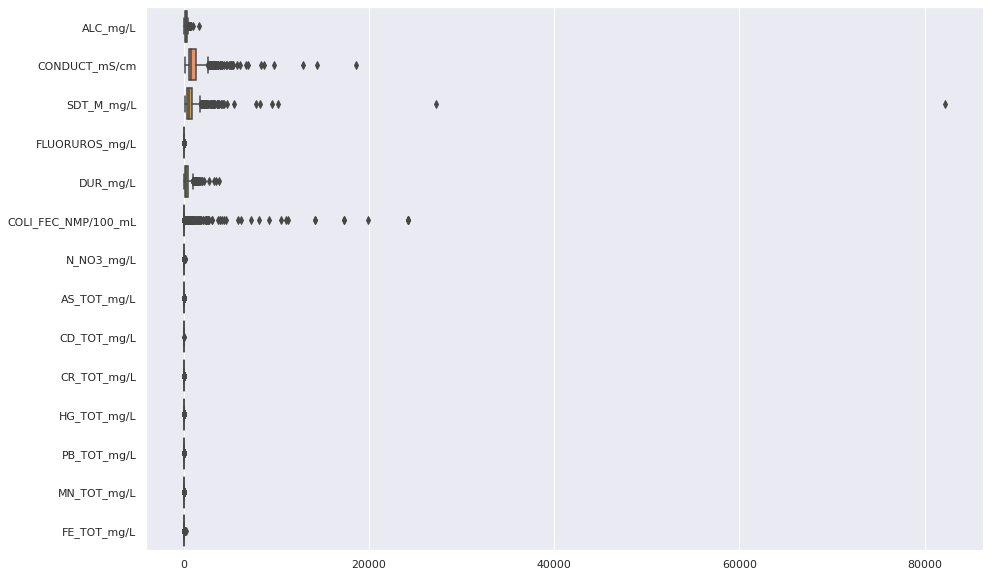

In [135]:
# Grafico de cajas
sns.boxplot(data = df_sust, orient="h")
plt.show()

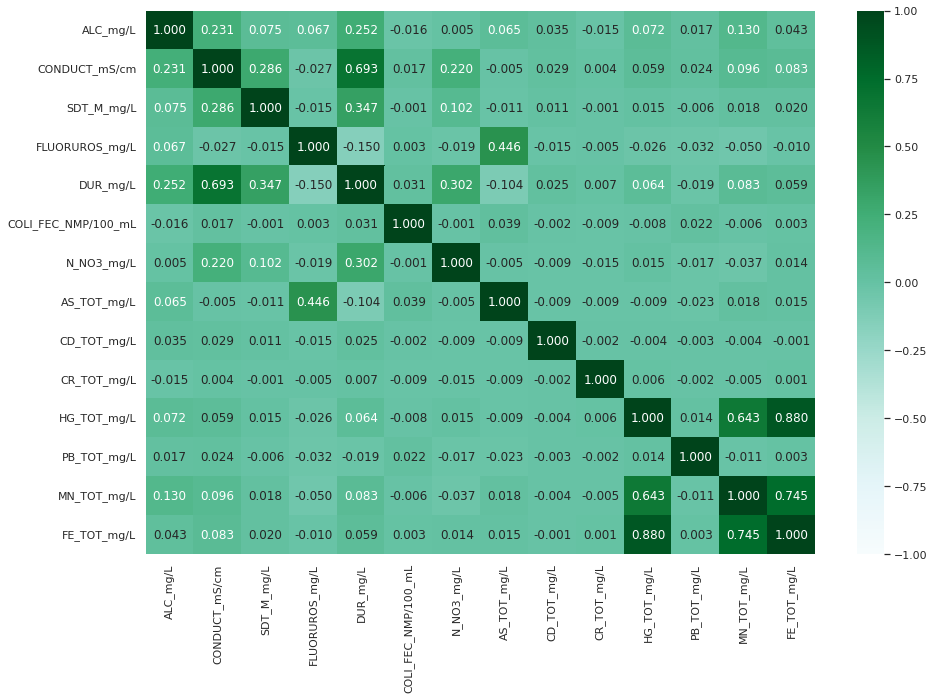

In [136]:
# Se visualiza la matriz de correlacion
corrs = df_sust.corr()
sns.set(rc = {'figure.figsize':(15,10)})
sns.heatmap(corrs, vmin = -1, vmax = 1, cmap = "BuGn", annot= True, fmt=".3f")

In [137]:
# Exploracion de la varianza
print('Varianza correspondiente a cada columna:')
print(df_sust.var())
print('\nTotal de varianza: ',sum(df_sust.var()))
print('\nProporcion de varianza de cada columna:')
print(np.round(df_sust.var()/sum(df_sust.var()),3)*100)

Varianza correspondiente a cada columna:
ALC_mg/L               1.235384e+04
CONDUCT_mS/cm          1.559978e+06
SDT_M_mg/L             7.649417e+06
FLUORUROS_mg/L         3.729549e+00
DUR_mg/L               1.302922e+05
COLI_FEC_NMP/100_mL    4.267140e+06
N_NO3_mg/L             7.019645e+01
AS_TOT_mg/L            1.228557e-03
CD_TOT_mg/L            8.102546e-07
CR_TOT_mg/L            2.415279e-02
HG_TOT_mg/L            2.206552e-07
PB_TOT_mg/L            1.073068e-05
MN_TOT_mg/L            1.435322e-01
FE_TOT_mg/L            3.107290e+01
dtype: float64

Total de varianza:  13619286.03779883

Proporcion de varianza de cada columna:
ALC_mg/L                0.1
CONDUCT_mS/cm          11.5
SDT_M_mg/L             56.2
FLUORUROS_mg/L          0.0
DUR_mg/L                1.0
COLI_FEC_NMP/100_mL    31.3
N_NO3_mg/L              0.0
AS_TOT_mg/L             0.0
CD_TOT_mg/L             0.0
CR_TOT_mg/L             0.0
HG_TOT_mg/L             0.0
PB_TOT_mg/L             0.0
MN_TOT_mg/L             

Segun su estadistica descriptiva y varianza, se aprecia como los valores entre columnas tienen diferentes escalas numericas, lo cual produce un alto indice de varianza. No nos podemos fiar de estos valores debido a las diferentes magnitudes que se presentan.

In [138]:
# Escalamiento de los datos
scaler = MinMaxScaler()
scaled = scaler.fit_transform(df_sust)
scaled_df_sust = pd.DataFrame(scaled, columns=df_sust.columns)
scaled_df_sust.head()

,ALC_mg/L,CONDUCT_mS/cm,SDT_M_mg/L,FLUORUROS_mg/L,DUR_mg/L,COLI_FEC_NMP/100_mL,N_NO3_mg/L,AS_TOT_mg/L,CD_TOT_mg/L,CR_TOT_mg/L,HG_TOT_mg/L,PB_TOT_mg/L,MN_TOT_mg/L,FE_TOT_mg/L
0,0.125265,0.044945,0.006122,0.022443,0.051107,0.000000,0.034422,0.013795,0.0,0.0,0.0,0.0,0.0,0.000359
1,0.126497,0.026967,0.004194,0.021090,0.043541,0.000000,0.047361,0.007689,0.0,0.0,0.0,0.0,0.0,0.000000
2,0.109822,0.022852,0.002934,0.046368,0.026570,0.000000,0.011818,0.061058,0.0,0.0,0.0,0.0,0.0,0.000000
3,0.185024,0.031191,0.004599,0.026671,0.047453,0.000000,0.010237,0.012212,0.0,0.0,0.0,0.0,0.0,0.000000
4,0.174481,0.093735,0.013133,0.000991,0.120555,0.011982,0.129370,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000


In [139]:
# Se explora nuevamente la varianza con los datos transformados
print('Varianza correspondiente a cada columna:')
print(scaled_df_sust.var())
print('\nTotal de varianza: ',sum(scaled_df_sust.var()))
print('\nProporcion de varianza de cada columna:')
print(np.round(scaled_df_sust.var()/sum(scaled_df_sust.var()),3)*100)

Varianza correspondiente a cada columna:
ALC_mg/L               0.004688
CONDUCT_mS/cm          0.004574
SDT_M_mg/L             0.001136
FLUORUROS_mg/L         0.003115
DUR_mg/L               0.009067
COLI_FEC_NMP/100_mL    0.007289
N_NO3_mg/L             0.004795
AS_TOT_mg/L            0.006283
CD_TOT_mg/L            0.000956
CR_TOT_mg/L            0.000967
HG_TOT_mg/L            0.001184
PB_TOT_mg/L            0.001863
MN_TOT_mg/L            0.001780
FE_TOT_mg/L            0.000974
dtype: float64

Total de varianza:  0.04867157843563119

Proporcion de varianza de cada columna:
ALC_mg/L                9.6
CONDUCT_mS/cm           9.4
SDT_M_mg/L              2.3
FLUORUROS_mg/L          6.4
DUR_mg/L               18.6
COLI_FEC_NMP/100_mL    15.0
N_NO3_mg/L              9.9
AS_TOT_mg/L            12.9
CD_TOT_mg/L             2.0
CR_TOT_mg/L             2.0
HG_TOT_mg/L             2.4
PB_TOT_mg/L             3.8
MN_TOT_mg/L             3.7
FE_TOT_mg/L             2.0
dtype: float64


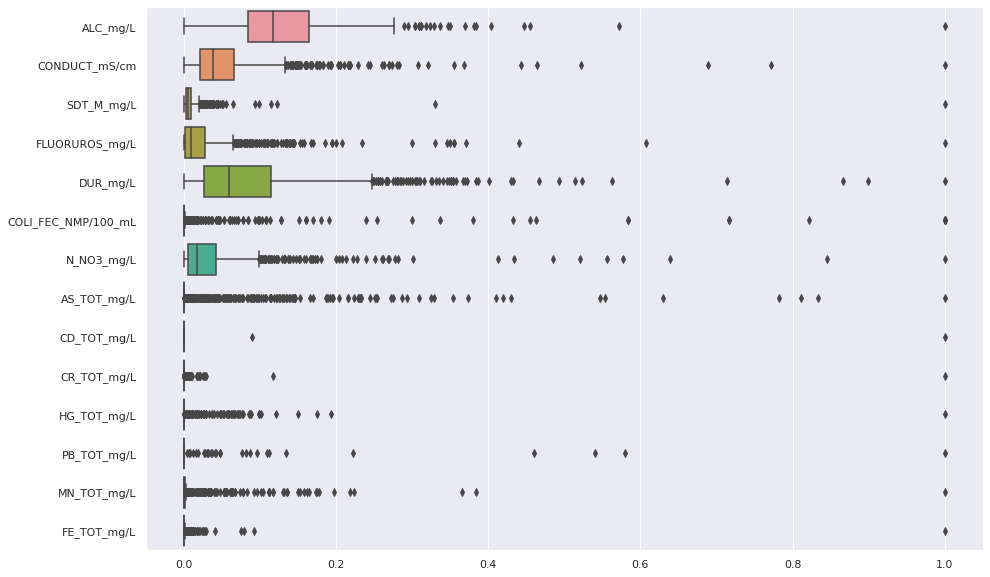

In [140]:
# Grafico de cajas
sns.boxplot(data = scaled_df_sust, orient="h")
plt.show()

In [141]:
scaled_df_sust.describe() #Datos estadisticos de dataframe escalado

,ALC_mg/L,CONDUCT_mS/cm,SDT_M_mg/L,FLUORUROS_mg/L,DUR_mg/L,COLI_FEC_NMP/100_mL,N_NO3_mg/L,AS_TOT_mg/L,CD_TOT_mg/L,CR_TOT_mg/L,HG_TOT_mg/L,PB_TOT_mg/L,MN_TOT_mg/L,FE_TOT_mg/L
count,1054.000000,1054.000000,1054.000000,1054.000000,1054.000000,1054.000000,1054.000000,1054.000000,1054.000000,1054.000000,1054.000000,1054.000000,1054.000000,1054.000000
mean,0.128163,0.055923,0.009696,0.025389,0.087027,0.014823,0.035554,0.021492,0.001034,0.001671,0.004192,0.003759,0.007957,0.002168
std,0.068468,0.067634,0.033700,0.055810,0.095223,0.085378,0.069249,0.079265,0.030922,0.031094,0.034413,0.043159,0.042187,0.031213
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.084773,0.021444,0.002886,0.002008,0.026779,0.000000,0.005221,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.116539,0.038447,0.005486,0.008871,0.059618,0.000000,0.017051,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000123
75%,0.164036,0.065955,0.009923,0.027234,0.114918,0.000399,0.042735,0.000000,0.000000,0.000000,0.000000,0.000000,0.000928,0.000825
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


Aun transformando los datos, en el grafico de cajas puede notar como la distribucion de los lados en cada columna no es uniforme y presentad una cantidad grande de outliers.

---
##**Relacion entre la calidad del agua y su ubicacion geografica utilizando Kmeans**

Mediante una gráfica de dispersión procedemos a visualizar las cordenadas de cada uno de los cuerpos de agua de la base de datos.

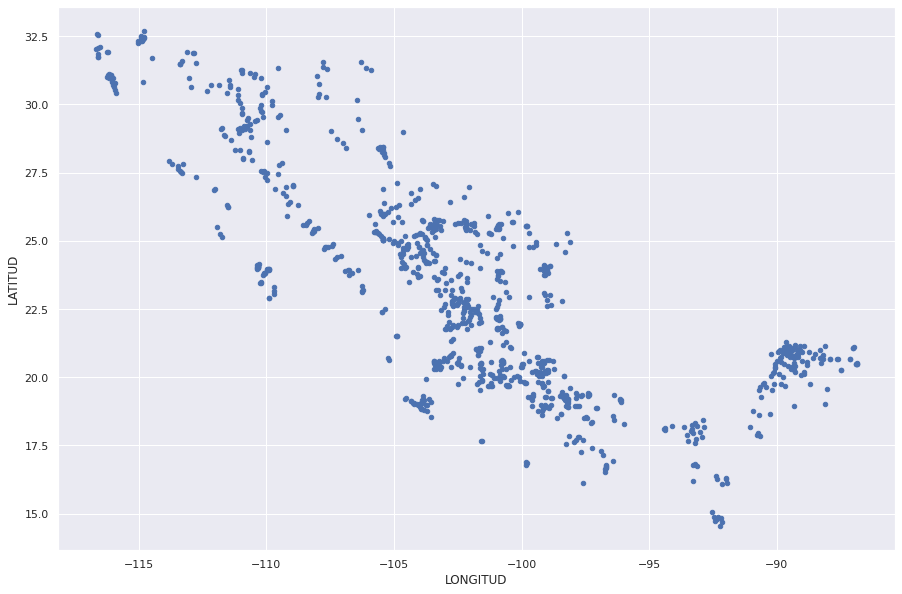

In [142]:
# Graficamos los cuerpos de agua segun sus coordenadas 
df_location.plot.scatter('LONGITUD','LATITUD')

In [143]:
#Generamos dataframe con los datos de las coordendas
df_location
df_location["COORDENADAS"] = list(zip(df_location.LONGITUD, df_location.LATITUD))
df_location["COORDENADAS"] = df_location["COORDENADAS"].apply(Point)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [144]:
df_location.head() #Mostramos el dataframe generado con las coordenadas

,LONGITUD,LATITUD,COORDENADAS
0,-102.02210,22.20887,POINT (-102.0221 22.20887)
1,-102.20075,21.99958,POINT (-102.20075 21.99958)
2,-102.28801,22.36685,POINT (-102.28801 22.36685)
3,-102.29449,22.18435,POINT (-102.29449 22.18435)
4,-110.24480,23.45138,POINT (-110.2448 23.45138)


,LONGITUD,LATITUD,COORDENADAS
0,-102.02210,22.20887,POINT (-102.02210 22.20887)
1,-102.20075,21.99958,POINT (-102.20075 21.99958)
2,-102.28801,22.36685,POINT (-102.28801 22.36685)
3,-102.29449,22.18435,POINT (-102.29449 22.18435)
4,-110.24480,23.45138,POINT (-110.24480 23.45138)
...,...,...,...
1063,-99.54191,24.76036,POINT (-99.54191 24.76036)
1064,-99.70099,24.78280,POINT (-99.70099 24.78280)
1065,-99.82249,25.55197,POINT (-99.82249 25.55197)
1066,-100.32683,24.80118,POINT (-100.32683 24.80118)


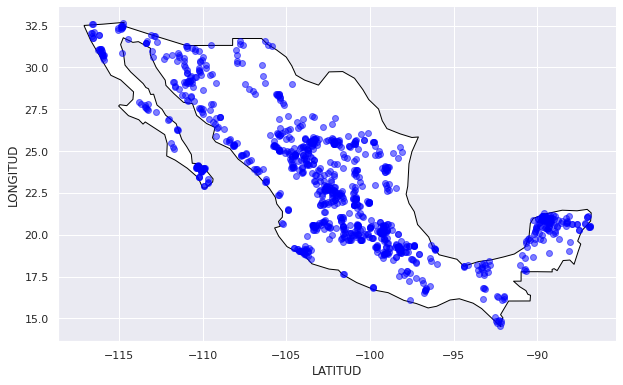

In [145]:
#Creamos Geodataframe
Mapa_Geo_Mex = gpd.GeoDataFrame(df_location, geometry="COORDENADAS")

world = gpd.read_file(gpd.datasets.get_path("naturalearth_lowres"))

world = world.set_index("iso_a3")
world.name.unique()
fig, gax = plt.subplots(figsize=(10,10))

world.query("name == 'Mexico'").plot(ax=gax, edgecolor='black',color='white')

gax.set_xlabel('LATITUD')
gax.set_ylabel('LONGITUD')

gax.spines['top'].set_visible(False)
gax.spines['right'].set_visible(False)

#Graficamos mapa
Mapa_Geo_Mex.plot(ax=gax, color='Blue', alpha = 0.5)

#Mostramos dataframe generado
Mapa_Geo_Mex

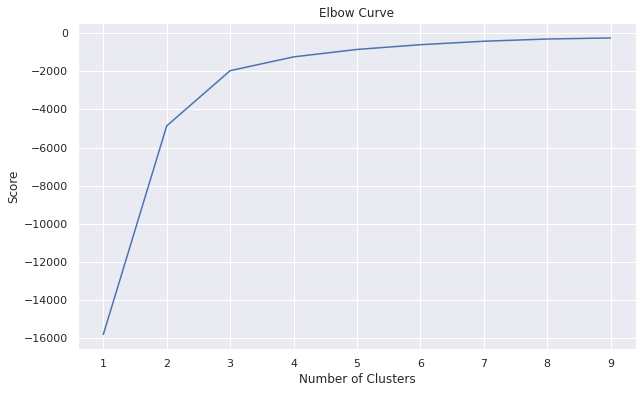

In [146]:
#Aplicamos Kmeans para generar la grafica de codo, que nos ayudara a determinar la cantidad de clusters 

#Definimos Kmeans usando las columnas de latitud y longitud
Cluster_num = range(1,10) 
kmeans_cluster = [KMeans(n_clusters=i) for i in Cluster_num]
Y_axis = df_location[['LATITUD']]
X_axis = df_location[['LONGITUD']]
train_kmeans = [kmeans_cluster[i].fit(Y_axis).score(Y_axis) for i in range(len(kmeans_cluster))]

#Grafica de codo
plt.figure(figsize=(10,6))
plt.plot(Cluster_num, train_kmeans)
plt.xlabel('Number of Clusters')
plt.ylabel('Score')
plt.title('Elbow Curve')

#Mostramos grafica
plt.show()

Según la gráfica de codo podemos observar que el valor de clústeres adecuado es de 3, ya que a partir del cuarto se aprecia una tendecia de mantenerse constante.

In [147]:
#Generamos los 3 centroides de los clusters
X = df[['LONGITUD', 'LATITUD']]

#Usamos calculo de kmeans con 3 clusters
kmeans = KMeans(n_clusters=3).fit(X)

#Obtenemos centroides
centroids = kmeans.cluster_centers_ 

#Prediccion de kmeans
labels = kmeans.predict(X) 

#Definimos dataframe con la informacion de los centroides de los clusters
df_centroids = pd.DataFrame(centroids) 
df_centroids["Coordinates"] = list(zip(df_centroids[0], df_centroids[1])) 
df_centroids["Coordinates"] = df_centroids["Coordinates"].apply(Point) 

#creamos Geodataframe de los centroides
centroids_plot = gpd.GeoDataFrame(df_centroids, geometry="Coordinates")
centroids_plot

,0,1,Coordinates
0,-101.715581,22.271624,POINT (-101.71558 22.27162)
1,-90.698434,19.475165,POINT (-90.69843 19.47516)
2,-110.740896,28.420375,POINT (-110.74090 28.42038)


In [148]:
# Conteo de cuerpos de agua de acuerdo a su respectivo color de semaforo
df['SEMAFORO'].value_counts()

Verde       427
Rojo        382
Amarillo    245
Name: SEMAFORO, dtype: int64

In [149]:
#Agregamos la columna semaforo y numero de clsuter
Mapa_Geo_Mex['SEMAFORO']= y['SEMAFORO']
Mapa_Geo_Mex['CLUSTER'] = labels
Mapa_Geo_Mex

,LONGITUD,LATITUD,COORDENADAS,SEMAFORO,CLUSTER
0,-102.02210,22.20887,POINT (-102.02210 22.20887),Verde,0
1,-102.20075,21.99958,POINT (-102.20075 21.99958),Verde,0
2,-102.28801,22.36685,POINT (-102.28801 22.36685),Rojo,0
3,-102.29449,22.18435,POINT (-102.29449 22.18435),Verde,0
4,-110.24480,23.45138,POINT (-110.24480 23.45138),Rojo,2
...,...,...,...,...,...
1063,-99.54191,24.76036,POINT (-99.54191 24.76036),Rojo,0
1064,-99.70099,24.78280,POINT (-99.70099 24.78280),Rojo,0
1065,-99.82249,25.55197,POINT (-99.82249 25.55197),Rojo,0
1066,-100.32683,24.80118,POINT (-100.32683 24.80118),Verde,0


In [150]:
#Cambiamos el nombre del color a ingles
Mapa_Geo_Mex['SEMAFORO_Plot'] = Mapa_Geo_Mex['SEMAFORO'].replace(to_replace = "Verde", value = "green")
Mapa_Geo_Mex['SEMAFORO_Plot'].replace(to_replace = "Rojo", value = "red", inplace=True)
Mapa_Geo_Mex['SEMAFORO_Plot'].replace(to_replace = "Amarillo", value = "yellow", inplace=True)

labels_semaforo = Mapa_Geo_Mex['SEMAFORO_Plot'].tolist()
Mapa_Geo_Mex['SEMAFORO_Plot']

0       green
1       green
2         red
3       green
4         red
        ...  
1063      red
1064      red
1065      red
1066    green
1067    green
Name: SEMAFORO_Plot, Length: 1054, dtype: object

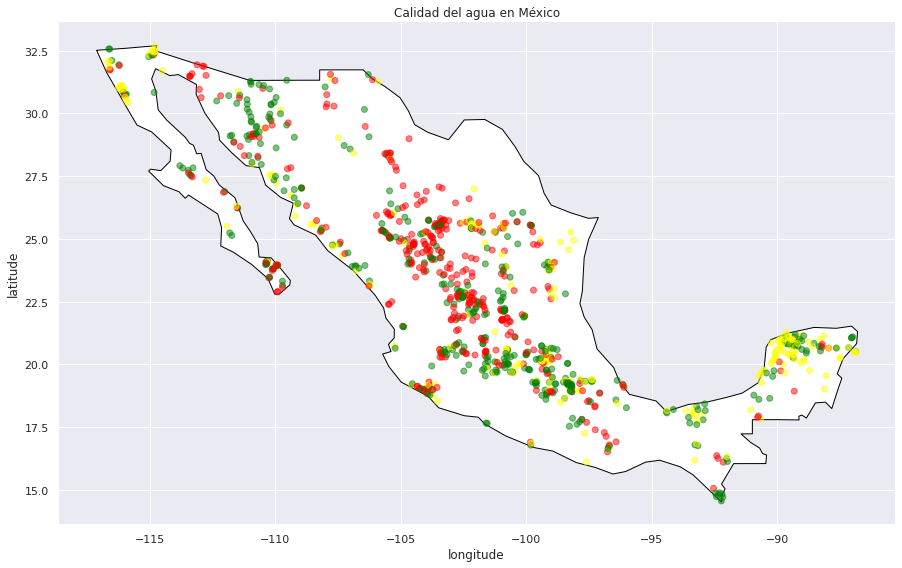

In [151]:
#Graficamos el mapa con los colores de semaforo individual de cada cuerpo de agua
fig, gax = plt.subplots(figsize=(15,10))

colores = ['green','yellow','red']

color_asig = []

for j in range(0,1054):
  color_asig.append(labels_semaforo[j])

world.query("name == 'Mexico'").plot(ax = gax, edgecolor='black', color='white')

Mapa_Geo_Mex.plot(ax=gax, color=color_asig, alpha = 0.5, legend=True)

gax.set_xlabel('longitude')
gax.set_ylabel('latitude')
gax.set_title('Calidad del agua en México')

gax.spines['top'].set_visible(False)
gax.spines['right'].set_visible(False)

plt.show()

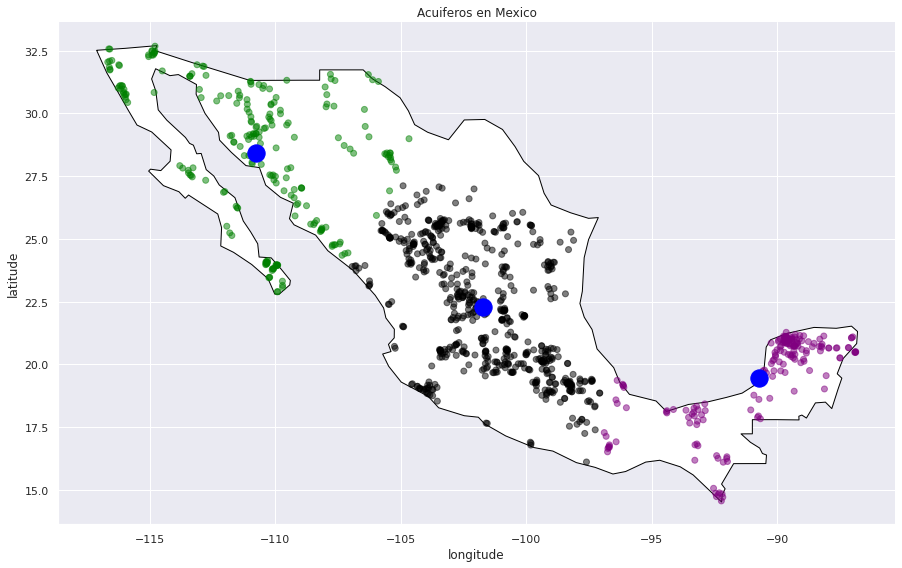

In [152]:
#Graficamos los clusters 
fig, gax = plt.subplots(figsize=(15,10))
colores = ['black','purple','green']
color_asig = []

for row in labels:
  color_asig.append(colores[row])

#Definimos parametros de grafica
world.query("name == 'Mexico'").plot(ax = gax, edgecolor='black', color='white') 

Mapa_Geo_Mex.plot(ax=gax, color=color_asig, alpha = 0.5) 
centroids_plot.plot(ax=gax, color='blue', alpha = 1, markersize = 300) 

gax.set_xlabel('longitude')
gax.set_ylabel('latitude')
gax.set_title('Acuiferos en Mexico')

gax.spines['top'].set_visible(False)
gax.spines['right'].set_visible(False)

plt.show()

---
##**Resultados de agrupamiento de latitudes y longitudes con Kmeans en el mapa de Mexico**

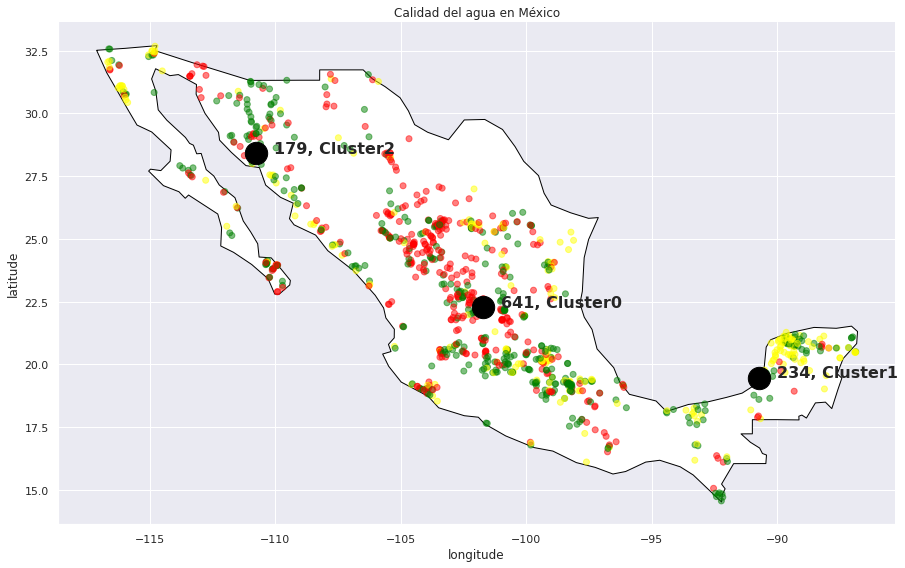

In [153]:
#Graficamos el mapa con los clusters y los colores de semaforo individual de cada cuerpo de agua
fig, gax = plt.subplots(figsize=(15,10))

colores = ['green','yellow','red']

color_asig = []

for j in range(0,1054):
  color_asig.append(labels_semaforo[j])

world.query("name == 'Mexico'").plot(ax = gax, edgecolor='black', color='white')

Mapa_Geo_Mex.plot(ax=gax, color=color_asig, alpha = 0.5, legend=True)

plt.scatter(centroids[:, 0], centroids[:, 1], c='black', s=500, alpha=1)

list_names_regions = ["Cluster0", "Cluster1", "Cluster2"]
list_stores_cluster = pd.DataFrame(labels).value_counts().to_list()
for i, txt in enumerate(list_stores_cluster):
    plt.annotate(str(txt)+ ", " + list_names_regions[i], (centroids[i,0], centroids[i,1]), xytext=(centroids[i,0]+0.7, centroids[i,1]), fontsize = 16, fontweight = "bold") 

gax.set_xlabel('longitude')
gax.set_ylabel('latitude')
gax.set_title('Calidad del agua en México')

gax.spines['top'].set_visible(False)
gax.spines['right'].set_visible(False)

plt.show()

In [154]:
#Determinamos la moda de cada cluster
mode_list=[]

for i in range(0,3):
  df_cluster = pd.DataFrame()
  df_cluster = Mapa_Geo_Mex[Mapa_Geo_Mex.CLUSTER == i].copy()
  moda = df_cluster['SEMAFORO'].mode()[0]
  mode_list.append(moda)

len(mode_list)


centroids_plot['MODA'] = mode_list
centroids_plot


,0,1,Coordinates,MODA
0,-101.715581,22.271624,POINT (-101.71558 22.27162),Rojo
1,-90.698434,19.475165,POINT (-90.69843 19.47516),Amarillo
2,-110.740896,28.420375,POINT (-110.74090 28.42038),Verde


In [155]:
#Relizamos el conteo de cada color de semaforo de cada uno de los clusters
Mapa_Geo_Mex["Cluster"] = labels
clusters_dict = {}
for i in range(3):
  if "Cluster"+str(i) not in clusters_dict:
      clusters_dict["Cluster"+str(i)] = []
  clusters_dict["Cluster"+str(i)] = Mapa_Geo_Mex[Mapa_Geo_Mex["Cluster"] == i].groupby(by="SEMAFORO")['SEMAFORO'].count()

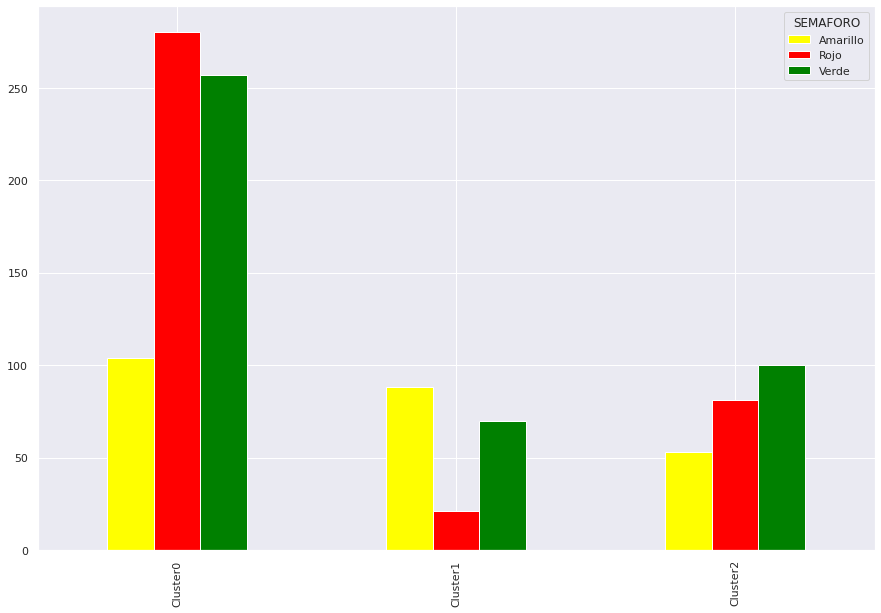

In [156]:
#Graficamos el conteo de las clases de cada cluster
Cluster_Semaforo = pd.DataFrame(clusters_dict)
Cluster_Semaforo.transpose().plot.bar(color={"Amarillo": "yellow", "Rojo": "red", "Verde": "green"})

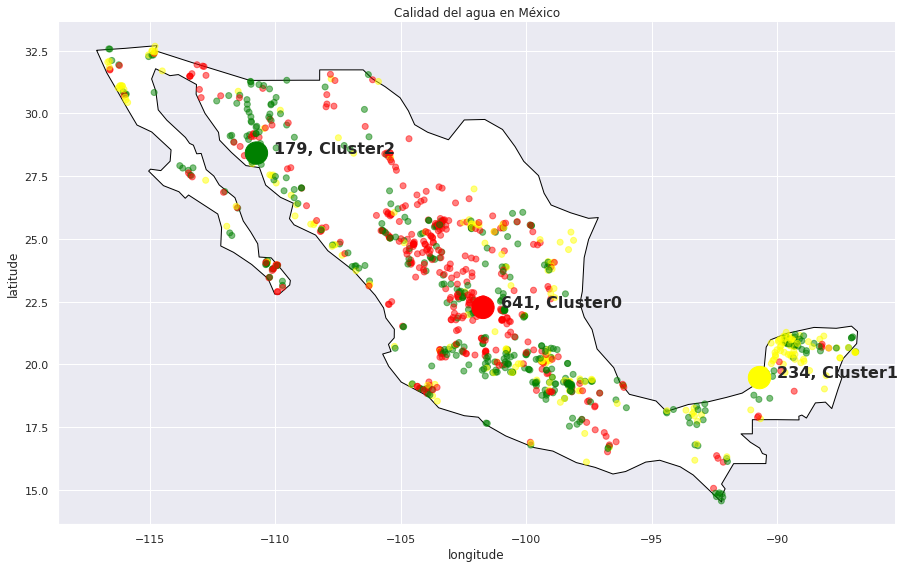

In [157]:
#Graficamos los clusters con sus color de semaforo basado en la moda 
fig, gax = plt.subplots(figsize=(15,10))

colores = ['green','yellow','red']

color_asig = []

for j in range(0,1054):
  color_asig.append(labels_semaforo[j])

world.query("name == 'Mexico'").plot(ax = gax, edgecolor='black', color='white')

Mapa_Geo_Mex.plot(ax=gax, color=color_asig, alpha = 0.5, legend=True)

plt.scatter(centroids[:, 0], centroids[:, 1], c=["red", "yellow", "green"], s=500, alpha=1)

list_names_regions = ["Cluster0", "Cluster1", "Cluster2"]
list_stores_cluster = pd.DataFrame(labels).value_counts().to_list()
for i, txt in enumerate(list_stores_cluster):
    plt.annotate(str(txt)+ ", " + list_names_regions[i], (centroids[i,0], centroids[i,1]), xytext=(centroids[i,0]+0.7, centroids[i,1]), fontsize = 16, fontweight = "bold") 

gax.set_xlabel('longitude')
gax.set_ylabel('latitude')
gax.set_title('Calidad del agua en México')

gax.spines['top'].set_visible(False)
gax.spines['right'].set_visible(False)

plt.show()

# **CONCLUSIONES**

Gracias a este ejercicio hemos descubierto datos interesantes sobre la calidad del agua en el país, asi como su relación con su ubicación geográfica. 

Gracias al uso de Kmeans hemos podido determinar los conjuntos o zonas de cuerpos de agua asi como su relación basada en su calidad. Notamos y concluimos que la mejor calidad de agua basada en la moda de los conjuntos o clusters es la que se encuentra en la zona noroeste, mientras que la peor calidad de agua la ubicamos en el centro del país. En la parte sur de México observamos que la categoría dominante es la amarilla.

Ahora bien si prestamos atención a la grafica de barras notamos que aunque la moda del cluster noroeste es verde, hay una cantidad similar de cuerpos de agua con semáforo rojo, lo que nos indica que en proporción estan casi parejos. 
Siguiendo esa tónica, podríamos considerar que la zona que menos semáforos rojos tiene es la zona sur (cluster1)



